# <a id='toc1_'></a>[**Data Preprocessing and Handling Techniques**](#toc0_)

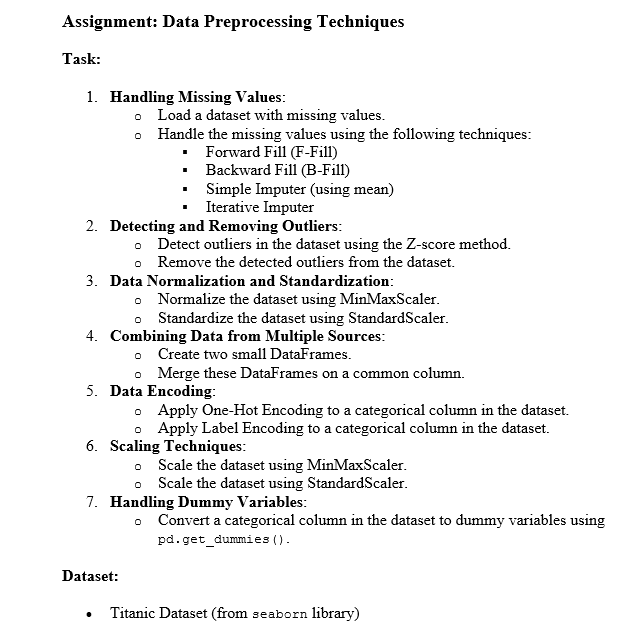

---

# **Table of contents**<a id='toc0_'></a>    
- [**Data Preprocessing and Handling Techniques**](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Loading the Titanic dataset](#toc1_2_)    
  - [Checking Missing Values](#toc1_3_)    
  - [Handling Missing Values](#toc1_4_)    
    - [Forward Fill(F-Fill)](#toc1_4_1_)    
    - [Backward Fill(B-Fill)](#toc1_4_2_)    
    - [Simple Imputer (using mean)](#toc1_4_3_)    
    - [Iterative Imputer](#toc1_4_4_)    
  - [Detecting and Removing Outliers](#toc1_5_)    
    - [Detect Outliers using the Z-score Method](#toc1_5_1_)    
  - [Data Normalization and Standardization](#toc1_6_)    
    - [Normalize the Dataset using MinMaxScaler](#toc1_6_1_)    
    - [Standardize the Dataset using StandardScaler](#toc1_6_2_)    
  - [Data Encoding](#toc1_7_)    
    - [Apply One-Hot Encoding to a Categorical Column](#toc1_7_1_)    
    - [Apply Label Encoding to a Categorical Column](#toc1_7_2_)    
  - [Scaling Techniques](#toc1_8_)    
    - [Scale the Dataset using MinMaxScaler](#toc1_8_1_)    
    - [Scale the Dataset using StandardScaler](#toc1_8_2_)    
  - [Handling Dummy Variables](#toc1_9_)    
    - [Convert a Categorical Column to Dummy Variables](#toc1_9_1_)    
  - [Combining Data from Multiple Sources](#toc1_10_)    
    - [Create Two Small DataFrames](#toc1_10_1_)    
    - [Merge the DataFrames on a Common Column](#toc1_10_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [32]:
# -----> Required Libraries
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import SimpleImputer, IterativeImputer
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
    from scipy.stats import zscore
except:
    !pip install pandas
    !pip install numpy
    !pip install seaborn
    !pip install scikit_learn
    !pip install scipy
    
    import pandas as pd
    import numpy as np
    import seaborn as sns
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import SimpleImputer, IterativeImputer
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
    from scipy.stats import zscore
    

---

## <a id='toc1_2_'></a>[Loading the Titanic dataset](#toc0_)

In [33]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

---

## <a id='toc1_3_'></a>[Checking Missing Values](#toc0_)

In [34]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
(titanic.isnull().sum()/len(titanic)) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

***Three columns have missing values, out of three deck is having more than 30% of data as missing. so we need to drop that column***

---

## <a id='toc1_4_'></a>[Handling Missing Values](#toc0_)

In [36]:
titanic.drop('deck',axis=1,inplace=True)

In [37]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

- ***Successfully deck colummn was removed.***

**Let's handle the remaining missing values**

### <a id='toc1_4_1_'></a>[Forward Fill(F-Fill)](#toc0_)

In [38]:
# Forward fill missing values
titanic_ffill = titanic.ffill()

# Display the first few rows of the dataset after forward fill
titanic_ffill.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### <a id='toc1_4_2_'></a>[Backward Fill(B-Fill)](#toc0_)

In [39]:
# Backward fill missing values
titanic_bfill = titanic.bfill()

# Display the first few rows of the dataset after backward fill
titanic_bfill.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### <a id='toc1_4_3_'></a>[Simple Imputer (using mean)](#toc0_)

In [40]:
# Simple imputer using mean
imputer_mean = SimpleImputer(strategy='mean')
titanic_mean_imputed = titanic.copy()
titanic_mean_imputed[['age', 'fare']] = imputer_mean.fit_transform(titanic_mean_imputed[['age', 'fare']])

# Display the first few rows of the dataset after mean imputation
titanic_mean_imputed.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### <a id='toc1_4_4_'></a>[Iterative Imputer](#toc0_)

In [41]:
# Iterative imputer
imputer_iterative = IterativeImputer()
titanic_iterative_imputed = titanic.copy()
titanic_iterative_imputed[['age', 'fare']] = imputer_iterative.fit_transform(titanic_iterative_imputed[['age', 'fare']])

# Display the first few rows of the dataset after iterative imputation
titanic_iterative_imputed.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.446937,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


---

## <a id='toc1_5_'></a>[Detecting and Removing Outliers](#toc0_)

### <a id='toc1_5_1_'></a>[Detect Outliers using the Z-score Method](#toc0_)

In [42]:
# Detect outliers using Z-score method
# Drop rows with missing values for 'age' and 'fare' before calculating Z-scores
titanic_no_na = titanic[['age', 'fare']].dropna()
print(titanic_no_na)
# Calculate Z-scores
z_scores = zscore(titanic_no_na)
print(z_scores)

abs_z_scores = np.abs(z_scores)

# Identify entries with Z-scores less than 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

filtered_entries.value_counts()



      age     fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
885  39.0  29.1250
886  27.0  13.0000
887  19.0  30.0000
889  26.0  30.0000
890  32.0   7.7500

[714 rows x 2 columns]
          age      fare
0   -0.530377 -0.518978
1    0.571831  0.691897
2   -0.254825 -0.506214
3    0.365167  0.348049
4    0.365167 -0.503850
..        ...       ...
885  0.640719 -0.105320
886 -0.185937 -0.410245
887 -0.737041 -0.088774
889 -0.254825 -0.088774
890  0.158503 -0.509523

[714 rows x 2 columns]


True     694
False     20
Name: count, dtype: int64

In [43]:

# Get the indices of the rows to keep
filtered_indices = titanic_no_na[filtered_entries].index

# Filter the original DataFrame based on these indices
titanic_no_outliers = titanic.loc[filtered_indices]

# Display the first few rows of the dataset with outliers removed
titanic_no_outliers.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


---

## <a id='toc1_6_'></a>[Data Normalization and Standardization](#toc0_)

### <a id='toc1_6_1_'></a>[Normalize the Dataset using MinMaxScaler](#toc0_)

In [44]:
# Normalize using MinMaxScaler
scaler_minmax = MinMaxScaler()
titanic_minmax = titanic.copy()
titanic_minmax[['age', 'fare']] = scaler_minmax.fit_transform(titanic_minmax[['age', 'fare']])

# Display the first few rows of the normalized dataset
titanic_minmax.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,Southampton,no,True


### <a id='toc1_6_2_'></a>[Standardize the Dataset using StandardScaler](#toc0_)

In [45]:
# Standardize using StandardScaler
scaler_standard = StandardScaler()
titanic_standard = titanic.copy()
titanic_standard[['age', 'fare']] = scaler_standard.fit_transform(titanic_standard[['age', 'fare']])

# Display the first few rows of the standardized dataset
titanic_standard.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,Southampton,no,False
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,Southampton,no,True


---

## <a id='toc1_7_'></a>[Data Encoding](#toc0_)

### <a id='toc1_7_1_'></a>[Apply One-Hot Encoding to a Categorical Column](#toc0_)

In [46]:
# One-Hot Encoding on 'sex' column
one_hot_encoded = pd.get_dummies(titanic['sex'], prefix='sex')

# Display the first few rows of the one-hot encoded columns
one_hot_encoded.head()


,sex_female,sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


### <a id='toc1_7_2_'></a>[Apply Label Encoding to a Categorical Column](#toc0_)

In [47]:
# Label Encoding on 'sex' column
label_encoder = LabelEncoder()
titanic_label_encoded = titanic.copy()
titanic_label_encoded['sex'] = label_encoder.fit_transform(titanic_label_encoded['sex'])

# Display the first few rows of the label encoded column
titanic_label_encoded.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


---

## <a id='toc1_8_'></a>[Scaling Techniques](#toc0_)

### <a id='toc1_8_1_'></a>[Scale the Dataset using MinMaxScaler](#toc0_)

In [48]:
# Scale using MinMaxScaler
scaled_minmax = scaler_minmax.fit_transform(titanic[['age', 'fare']])

# Display the first few rows of the scaled data
scaled_minmax[:5]


array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       [0.43453129, 0.1036443 ],
       [0.43453129, 0.01571255]])

### <a id='toc1_8_2_'></a>[Scale the Dataset using StandardScaler](#toc0_)

In [49]:
# Scale using StandardScaler
scaled_standard = scaler_standard.fit_transform(titanic[['age', 'fare']])

# Display the first few rows of the scaled data
scaled_standard[:5]


array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       [ 0.36516706,  0.42073024],
       [ 0.36516706, -0.48633742]])

---

## <a id='toc1_9_'></a>[Handling Dummy Variables](#toc0_)

### <a id='toc1_9_1_'></a>[Convert a Categorical Column to Dummy Variables](#toc0_)

In [50]:
# Convert 'sex' column to dummy variables
dummy_variables = pd.get_dummies(titanic['sex'], drop_first=True)

# Display the first few rows of the dummy variables
dummy_variables.head()


,male
0,True
1,False
2,False
3,False
4,True


---

## <a id='toc1_10_'></a>[Combining Data from Multiple Sources](#toc0_)

### <a id='toc1_10_1_'></a>[Create Two Small DataFrames](#toc0_)

In [51]:
# Create two small DataFrames
data1 = pd.DataFrame({
    'id': [1, 2, 3],
    'value1': ['A', 'B', 'C']
})

data2 = pd.DataFrame({
    'id': [1, 2, 3],
    'value2': ['D', 'E', 'F']
})



In [52]:
data1

,id,value1
0,1,A
1,2,B
2,3,C


In [53]:
data2

,id,value2
0,1,D
1,2,E
2,3,F


### <a id='toc1_10_2_'></a>[Merge the DataFrames on a Common Column](#toc0_)

In [54]:
# Merge DataFrames on 'id' column
merged_data = pd.merge(data1, data2, on='id')

# Display the merged DataFrame

merged_data


,id,value1,value2
0,1,A,D
1,2,B,E
2,3,C,F
